In [62]:
%matplotlib notebook

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os 
from scipy.stats import linregress
from nba_api.stats.static import teams

from statistics import mean 
from statistics import median

In [64]:
# set city to search
#city = 'oklahoma'
city = 'houston'

# set output files
dir_name ="DATA/"
base_filename = city
filename_suffix =".csv"
season_out = os.path.join(dir_name, base_filename + "_2018-2019_league_Data" + filename_suffix)

output_file = os.path.join("Plot/", base_filename + "_WL.png")
output_file2 = os.path.join("Plot/", base_filename + "_pts_plusMinus.png")

In [65]:
# Find teams by city.
team_info = teams.find_teams_by_city(city)
full_name = team_info[0]["full_name"]
full_name

'Houston Rockets'

In [66]:
city_df = pd.read_csv(season_out)
city_df.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22018,1610612745,HOU,Houston Rockets,21801218,2019-04-09,HOU @ OKC,L,239,111,...,0.850,9,33,42,18,7,7,11,21,-1.0
1,22018,1610612745,HOU,Houston Rockets,21801200,2019-04-07,HOU vs. PHX,W,240,149,...,0.762,12,40,52,34,12,5,9,16,36.0
2,22018,1610612745,HOU,Houston Rockets,21801184,2019-04-05,HOU vs. NYK,W,241,120,...,0.706,7,41,48,26,8,2,6,21,24.0
3,22018,1610612745,HOU,Houston Rockets,21801176,2019-04-03,HOU @ LAC,W,239,135,...,0.793,12,36,48,22,6,7,16,29,32.0
4,22018,1610612745,HOU,Houston Rockets,21801163,2019-04-02,HOU @ SAC,W,241,130,...,0.706,8,35,43,30,8,3,7,20,25.0


In [67]:
Total_games = len(city_df) # total games played in official season
Total_games

82

In [68]:
city_extract_df = city_df[["GAME_ID","MATCHUP","GAME_DATE","WL","PTS","PLUS_MINUS"]]
city_extract_df.head()

,GAME_ID,MATCHUP,GAME_DATE,WL,PTS,PLUS_MINUS
0,21801218,HOU @ OKC,2019-04-09,L,111,-1.0
1,21801200,HOU vs. PHX,2019-04-07,W,149,36.0
2,21801184,HOU vs. NYK,2019-04-05,W,120,24.0
3,21801176,HOU @ LAC,2019-04-03,W,135,32.0
4,21801163,HOU @ SAC,2019-04-02,W,130,25.0


In [69]:
WL_df = city_extract_df.groupby("WL").count()["GAME_ID"]
WL_df

WL
L    29
W    53
Name: GAME_ID, dtype: int64

In [70]:
Home_df = city_extract_df[city_extract_df['MATCHUP'].str.contains("@")]
Home_df.head()

,GAME_ID,MATCHUP,GAME_DATE,WL,PTS,PLUS_MINUS
0,21801218,HOU @ OKC,2019-04-09,L,111,-1.0
3,21801176,HOU @ LAC,2019-04-03,W,135,32.0
4,21801163,HOU @ SAC,2019-04-02,W,130,25.0
7,21801111,HOU @ MIL,2019-03-26,L,94,-14.0
8,21801099,HOU @ NOP,2019-03-24,W,113,23.0


In [71]:
away_df = city_extract_df[city_extract_df['MATCHUP'].str.contains("vs")]
away_df.head()

,GAME_ID,MATCHUP,GAME_DATE,WL,PTS,PLUS_MINUS
1,21801200,HOU vs. PHX,2019-04-07,W,149,36.0
2,21801184,HOU vs. NYK,2019-04-05,W,120,24.0
5,21801138,HOU vs. SAC,2019-03-30,W,119,11.0
6,21801126,HOU vs. DEN,2019-03-28,W,112,27.0
9,21801084,HOU vs. SAS,2019-03-22,W,111,6.0


In [11]:
home_WL = Home_df.groupby("WL").count()["GAME_ID"]
home_WL_df = pd.DataFrame(home_WL)
home_WL_df.columns=['Home']
home_WL_df

,Home
WL,
L,19
W,22


In [12]:
away_WL = away_df.groupby("WL").count()["GAME_ID"]
away_WL_df = pd.DataFrame(away_WL)
away_WL_df.columns=['Away']
away_WL_df

,Away
WL,
L,10
W,31


In [13]:
WL_df = pd.DataFrame(WL_df)
WL_df.columns=['Total']

#WL_df.merge(away_WL_df,on="WL")
WL_df

,Total
WL,
L,29
W,53


In [14]:
Total_perc = WL_df["Total"]/Total_games *100
Total_perc_df = pd.DataFrame(Total_perc).round(decimals=2)
Total_perc_df.columns=['Total (%)']
Total_perc_df

,Total (%)
WL,
L,35.37
W,64.63


In [15]:
#WL_df.merge(home_WL_df,on="WL",how="inner")
city_WL=pd.merge(WL_df,Total_perc_df,on="WL")
             
city_WL

,Total,Total (%)
WL,,
L,29,35.37
W,53,64.63


In [16]:
city_WL = pd.merge(city_WL,home_WL_df,on="WL")
city_WL

,Total,Total (%),Home
WL,,,
L,29,35.37,19
W,53,64.63,22


In [17]:
home_perc = city_WL['Home']/Total_games *100
home_perc_df = pd.DataFrame(home_perc).round(decimals=2)
home_perc_df.columns=['Home (%)']
home_perc_df

,Home (%)
WL,
L,23.17
W,26.83


In [18]:
city_WL = pd.merge(city_WL,home_perc_df,on="WL")
city_WL

,Total,Total (%),Home,Home (%)
WL,,,,
L,29,35.37,19,23.17
W,53,64.63,22,26.83


In [19]:
city_WL = pd.merge(city_WL,away_WL_df,on="WL")
city_WL

,Total,Total (%),Home,Home (%),Away
WL,,,,,
L,29,35.37,19,23.17,10
W,53,64.63,22,26.83,31


In [20]:
away_perc = city_WL['Away']/Total_games *100
away_perc_df = pd.DataFrame(away_perc).round(decimals=2)
away_perc_df.columns=['Away (%)']
away_perc_df

,Away (%)
WL,
L,12.2
W,37.8


In [21]:
city_WL=pd.merge(city_WL,away_perc_df,on="WL")
city_WL

,Total,Total (%),Home,Home (%),Away,Away (%)
WL,,,,,,
L,29,35.37,19,23.17,10,12.2
W,53,64.63,22,26.83,31,37.8


In [22]:
L=[city_WL["Total (%)"][0] , city_WL["Home (%)"][0] , city_WL["Away (%)"][0] ]
L

[35.37, 23.17, 12.2]

In [23]:
W=[city_WL["Total (%)"][1] , city_WL["Home (%)"][1] , city_WL["Away (%)"][1] ]
W

[64.63, 26.83, 37.8]

<IPython.core.display.Javascript object>


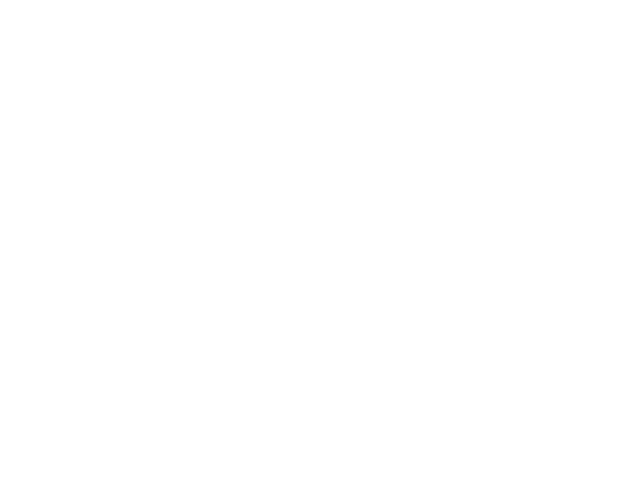

In [24]:
ymax = 70

fig1=plt.figure(1)

x_axis = np.arange(len(W))
plt.bar(x_axis -0.1,W,width=0.2,color='g',align='center',label="Win")
plt.bar(x_axis+0.1,L,width=0.2,color='r',align='center',label="Lost")

# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["All games","Home","Away"])

# Set the limits of the x axis
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0,ymax)


# Give the chart a title, x label, and y label

plt.xlabel("Game type")
plt.ylabel("Percentage")

plt.legend(loc='best')

#title_str = "Percentage of WL -" +  full_name
plt.title(f"Percentage of WL - %s" %full_name)

plt.savefig(output_file)

In [25]:
plt.show()
plt.close(fig1)

## Look into the +/- data, combination of (W,L) and (Home,Away)

In [26]:
# compute average pts when away
away_WL_PT_mean = away_df.groupby("WL").mean()["PTS"]
away_WL_PT_mean

WL
L    109.000000
W    119.290323
Name: PTS, dtype: float64

In [27]:
# compute average plus_minus when away
away_WL_plus_Minus_mean = away_df.groupby("WL").mean()["PLUS_MINUS"]
away_WL_plus_Minus_mean

WL
L   -11.100000
W    12.967742
Name: PLUS_MINUS, dtype: float64

In [28]:
# compute average pts when home
home_WL_PT_mean = Home_df.groupby("WL").mean()["PTS"]
home_WL_PT_mean

WL
L    104.631579
W    116.590909
Name: PTS, dtype: float64

In [29]:
# compute average plus_minus when home
home_WL_plus_minus_mean = Home_df.groupby("WL").mean()["PLUS_MINUS"]
home_WL_plus_minus_mean

WL
L    -9.421053
W    12.681818
Name: PLUS_MINUS, dtype: float64

In [30]:
# extract Win from home 
Home_W_df = Home_df[Home_df["WL"] == "W"]
Home_W_df.head()

,GAME_ID,MATCHUP,GAME_DATE,WL,PTS,PLUS_MINUS
3,21801176,HOU @ LAC,2019-04-03,W,135,32.0
4,21801163,HOU @ SAC,2019-04-02,W,130,25.0
8,21801099,HOU @ NOP,2019-03-24,W,113,23.0
11,21801060,HOU @ ATL,2019-03-19,W,121,16.0
16,21800997,HOU @ DAL,2019-03-10,W,94,1.0


In [31]:
# extract lost from home 
Home_L_df = Home_df[Home_df["WL"] == "L"]
Home_L_df.head()

,GAME_ID,MATCHUP,GAME_DATE,WL,PTS,PLUS_MINUS
0,21801218,HOU @ OKC,2019-04-09,L,111,-1.0
7,21801111,HOU @ MIL,2019-03-26,L,94,-14.0
10,21801070,HOU @ MEM,2019-03-20,L,125,-1.0
24,21800872,HOU @ LAL,2019-02-21,L,106,-5.0
25,21800861,HOU @ MIN,2019-02-13,L,111,-10.0


In [32]:
# extract win from away
away_W_df = away_df[away_df["WL"] == "W"]
away_W_df.head()

,GAME_ID,MATCHUP,GAME_DATE,WL,PTS,PLUS_MINUS
1,21801200,HOU vs. PHX,2019-04-07,W,149,36.0
2,21801184,HOU vs. NYK,2019-04-05,W,120,24.0
5,21801138,HOU vs. SAC,2019-03-30,W,119,11.0
6,21801126,HOU vs. DEN,2019-03-28,W,112,27.0
9,21801084,HOU vs. SAS,2019-03-22,W,111,6.0


In [33]:
# extract lost from away
away_L_df = away_df[away_df["WL"] == "L"]
away_L_df

,GAME_ID,MATCHUP,GAME_DATE,WL,PTS,PLUS_MINUS
14,21801018,HOU vs. GSW,2019-03-13,L,104,-2.0
27,21800832,HOU vs. OKC,2019-02-09,L,112,-5.0
32,21800753,HOU vs. NOP,2019-01-29,L,116,-5.0
38,21800659,HOU vs. BKN,2019-01-16,L,142,-3.0
42,21800610,HOU vs. MIL,2019-01-09,L,109,-7.0
62,21800309,HOU vs. DAL,2018-11-28,L,108,-20.0
76,21800101,HOU vs. POR,2018-10-30,L,85,-19.0
77,21800070,HOU vs. LAC,2018-10-26,L,113,-20.0
78,21800057,HOU vs. UTA,2018-10-24,L,89,-11.0
81,21800009,HOU vs. NOP,2018-10-17,L,112,-19.0


In [34]:
away_L_PlusMinus = away_df[away_df["WL"] == "L"]["PLUS_MINUS"]
away_L_PlusMinus

14    -2.0
27    -5.0
32    -5.0
38    -3.0
42    -7.0
62   -20.0
76   -19.0
77   -20.0
78   -11.0
81   -19.0
Name: PLUS_MINUS, dtype: float64

In [35]:
away_L_Pts = away_df[away_df["WL"] == "L"]["PTS"]
away_L_Pts

14    104
27    112
32    116
38    142
42    109
62    108
76     85
77    113
78     89
81    112
Name: PTS, dtype: int64

In [36]:
Home_L_PlusMinus = Home_df[Home_df["WL"] == "L"]["PLUS_MINUS"]
Home_L_Pts = Home_df[Home_df["WL"] == "L"]["PTS"]

In [37]:
away_W_PlusMinus = away_df[away_df["WL"] == "W"]["PLUS_MINUS"]
away_W_Pts = away_df[away_df["WL"] == "W"]["PTS"]

In [38]:
away_W_PlusMinus = away_df[away_df["WL"] == "W"]["PLUS_MINUS"]
away_W_Pts = away_df[away_df["WL"] == "W"]["PTS"]
Home_W_PlusMinus = Home_df[Home_df["WL"] == "W"]["PLUS_MINUS"]
Home_W_Pts = Home_df[Home_df["WL"] == "W"]["PTS"]

In [39]:
# prepare data for linear regression
PTS_ALL_df = city_extract_df[["PTS"]]
PLUS_MINUS_ALL_df = city_extract_df[["PLUS_MINUS"]]

In [40]:
PTS_ALL_df.head() 

,PTS
0,111
1,149
2,120
3,135
4,130


In [41]:
# remove outliers 
print(f"mean(PTS_ALL)= {PTS_ALL_df.mean()}")
print(f"median(PTS_ALL)= {PTS_ALL_df.median()}")


mean(PTS_ALL)= PTS    113.914634
dtype: float64
median(PTS_ALL)= PTS    113.0
dtype: float64


In [42]:
# calculate the cutoff 
# I define the cutoff as cutoff = mean(75% stat, max value)
stat= PTS_ALL_df.describe()
cutoff= (stat["PTS"][6] + stat["PTS"][7])/2
cutoff

135.0

In [43]:
stat

,PTS
count,82.000000
mean,113.914634
std,13.702484
min,80.000000
25%,107.000000
50%,113.000000
75%,121.000000
max,149.000000


In [44]:
PTS_ALL_before_drop = PTS_ALL_df
PTS_ALL_df = PTS_ALL_df[PTS_ALL_df["PTS"]<=cutoff]
PTS_ALL_df.count()

PTS    76
dtype: int64

In [45]:
PTS_outlier = PTS_ALL_df[PTS_ALL_df["PTS"]>cutoff]
PTS_outlier.count()

PTS    0
dtype: int64

In [46]:
PTS_outlier["PTS"].count()

0

In [47]:
PTS_ALL_df=PTS_ALL_before_drop

In [48]:
# get index of outliers (to remove data from PLUS_MINUS)
idx_outlier = []
if (PTS_outlier["PTS"].count() != 0):
    for i in range (len(PTS_ALL_before_drop)):
        for j in range (len(PTS_outlier)):
            if (PTS_ALL_before_drop["PTS"].iloc[i] == PTS_outlier["PTS"].iloc[j]):
                idx_outlier.append(i)

idx_outlier

[]

In [49]:
# remove outliers in PLUS_MINUS
PLUS_MINUS_ALL_df_before_drop = PLUS_MINUS_ALL_df
PLUS_MINUS_outlier =[]

for i in range (len(idx_outlier)):
    PLUS_MINUS_outlier.append(PLUS_MINUS_ALL_df.loc[idx_outlier[i]])
    PLUS_MINUS_ALL_df = PLUS_MINUS_ALL_df.drop(idx_outlier[i])
    
PLUS_MINUS_ALL_df.count()

PLUS_MINUS    82
dtype: int64

In [50]:
# transform DF to series
PTS_ALL = PTS_ALL_df.squeeze()
PLUS_MINUS_ALL = PLUS_MINUS_ALL_df.squeeze()
 

In [51]:
PTS_ALL.count()

82

In [52]:
PLUS_MINUS_ALL.count()

82

In [53]:
# linear regression

# Set line
(slope, intercept, r_value, p_value, std_err) = linregress(PTS_ALL, PLUS_MINUS_ALL)

#x_axis = np.arange(70, 160, 10)
fit = slope * PTS_ALL + intercept
fit.head()

0     2.973836
1    26.369348
2     8.514878
3    17.749949
4    14.671592
Name: PTS, dtype: float64

In [54]:
PTS_outlier

,PTS


<IPython.core.display.Javascript object>


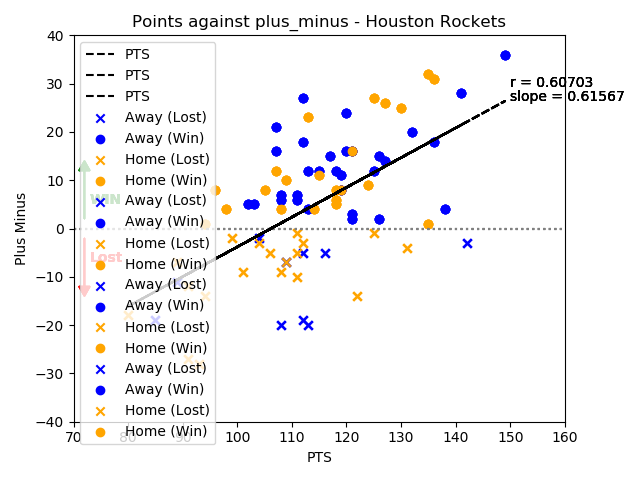

In [57]:
x_min = 70
x_max = 160
y_min = -40
y_max = 40

fig2=plt.figure(2)
plt.scatter(away_L_Pts,away_L_PlusMinus,color='blue',marker='x',label='Away (Lost)')
plt.scatter(away_W_Pts,away_W_PlusMinus,color='blue',marker='o',label='Away (Win)')
plt.scatter(Home_L_Pts,Home_L_PlusMinus,color='orange',marker='x',label='Home (Lost)')
plt.scatter(Home_W_Pts,Home_W_PlusMinus,color='orange',marker='o',label='Home (Win)')


plt.plot([x_min,x_max],[0,0],color='grey',linestyle=':')

plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)

plt.legend(loc='upper left')
plt.xlabel("PTS")
plt.ylabel("Plus Minus")
plt.title(f"Points against plus_minus - %s" %full_name)

plt.text(x_min+3, 5,"WIN",color='green',weight='bold')
plt.arrow(x_min+2,  2,0,10, head_width=2, head_length=2, fc='green', ec='green')

plt.text(x_min+3, -7,"Lost",color='red',weight='bold')
plt.arrow(x_min+2, -2,0,-10, head_width=2, head_length=2, fc='red', ec='red')

#plot linear regression 
r_value=r_value.round(decimals=5)
slope = slope.round(decimals=5)

plt.plot(PTS_ALL, fit, 'k--')

# for R. Westbrook
plt.text(max(PTS_ALL)+1, max(fit)+3,f"r = {r_value}")
plt.text(max(PTS_ALL)+1, max(fit),f"slope = {slope}")

for i in range (len(PTS_outlier)):
    if (PLUS_MINUS_outlier[i][0] > 0):
        plt.scatter(PTS_outlier["PTS"].iloc[i],PLUS_MINUS_outlier[i][0],color='grey',marker='o')
    else:
        plt.scatter(PTS_outlier["PTS"].iloc[i],PLUS_MINUS_outlier[i][0],color='grey',marker='x')
    

plt.tight_layout()


plt.savefig(output_file2)

plt.show()

In [74]:
away_L_PlusMinus = away_df[away_df["WL"] == "L"]["PLUS_MINUS"]
away_L_Pts = away_df[away_df["WL"] == "L"]["AST"]
Home_L_PlusMinus = Home_df[Home_df["WL"] == "L"]["PLUS_MINUS"]
Home_L_Pts = Home_df[Home_df["WL"] == "L"]["AST"]
away_W_PlusMinus = away_df[away_df["WL"] == "W"]["PLUS_MINUS"]
away_W_Pts = away_df[away_df["WL"] == "W"]["AST"]
Home_W_PlusMinus = Home_df[Home_df["WL"] == "W"]["PLUS_MINUS"]
Home_W_Pts = Home_df[Home_df["WL"] == "W"]["AST"]

KeyError: 'AST'

<IPython.core.display.Javascript object>


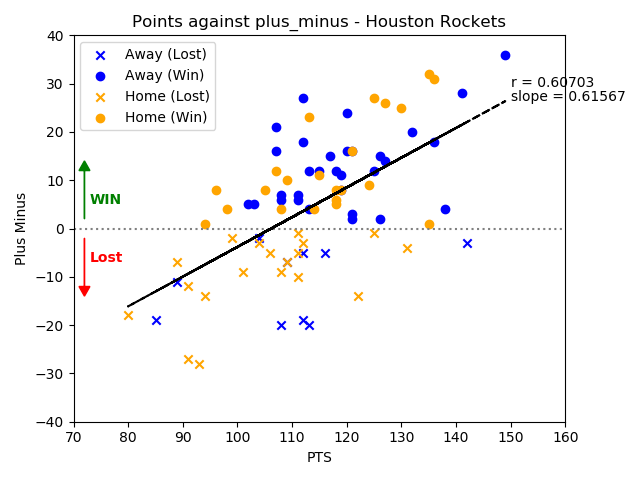

In [75]:
x_min = 70
x_max = 160
y_min = -40
y_max = 40

fig2=plt.figure(2)
plt.scatter(away_L_Pts,away_L_PlusMinus,color='blue',marker='x',label='Away (Lost)')
plt.scatter(away_W_Pts,away_W_PlusMinus,color='blue',marker='o',label='Away (Win)')
plt.scatter(Home_L_Pts,Home_L_PlusMinus,color='orange',marker='x',label='Home (Lost)')
plt.scatter(Home_W_Pts,Home_W_PlusMinus,color='orange',marker='o',label='Home (Win)')


plt.plot([x_min,x_max],[0,0],color='grey',linestyle=':')

plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)

plt.legend(loc='upper left')
plt.xlabel("PTS")
plt.ylabel("Plus Minus")
plt.title(f"Points against plus_minus - %s" %full_name)

plt.text(x_min+3, 5,"WIN",color='green',weight='bold')
plt.arrow(x_min+2,  2,0,10, head_width=2, head_length=2, fc='green', ec='green')

plt.text(x_min+3, -7,"Lost",color='red',weight='bold')
plt.arrow(x_min+2, -2,0,-10, head_width=2, head_length=2, fc='red', ec='red')

#plot linear regression 
r_value=r_value.round(decimals=5)
slope = slope.round(decimals=5)

plt.plot(PTS_ALL, fit, 'k--')

# for R. Westbrook
plt.text(max(PTS_ALL)+1, max(fit)+3,f"r = {r_value}")
plt.text(max(PTS_ALL)+1, max(fit),f"slope = {slope}")


plt.tight_layout()


plt.savefig(output_file2)

plt.show()